# <center>Homework 2</center>
## <center>Convolution Operation</center>
### Name: Fatima Azfar
### Roll No: 20L-1027
### Section: BDS-8A

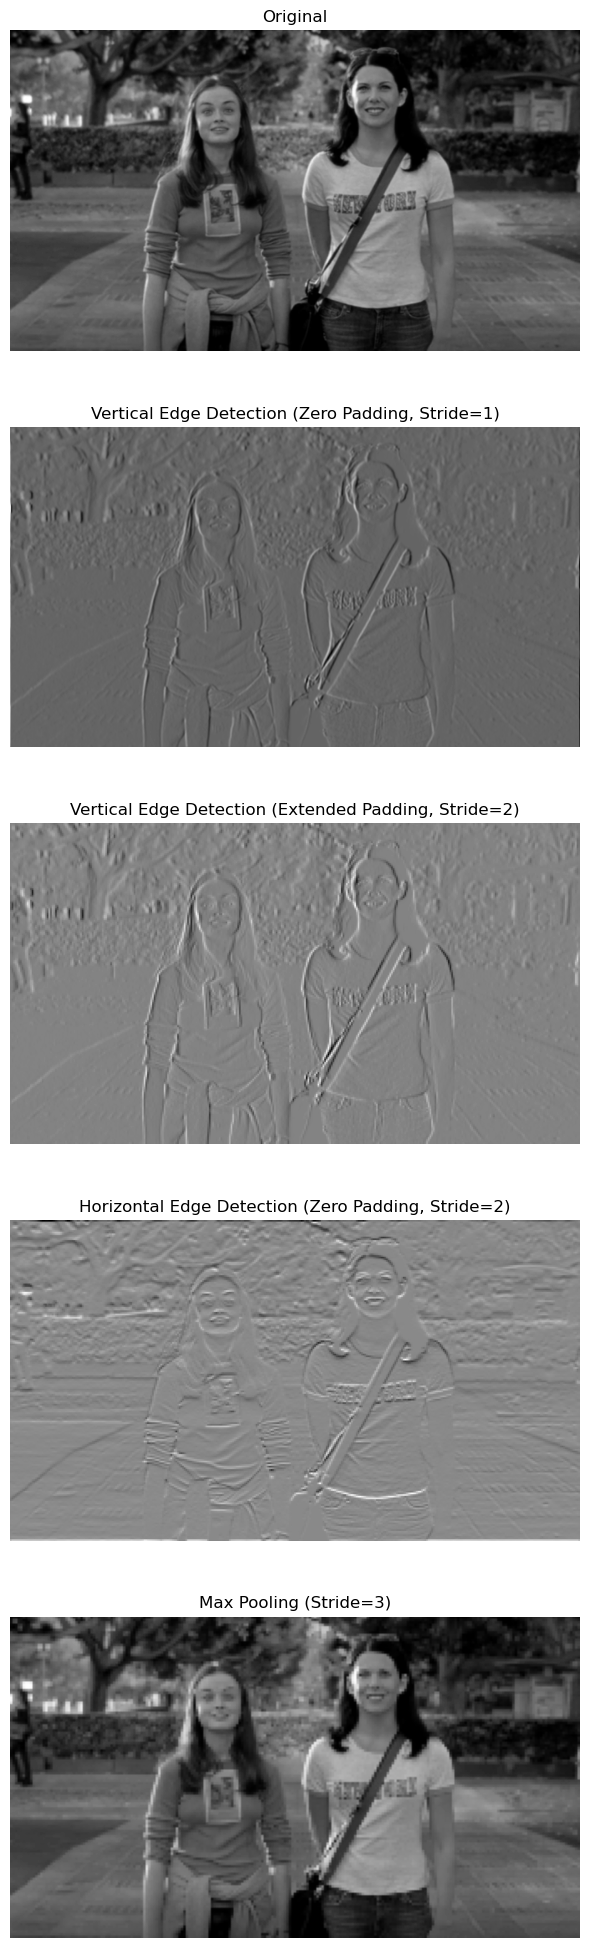

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolve2D(image, kernel, padding=0, strides=1, padding_type='zero'):
    if padding_type == 'extended':
        image_padded = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REPLICATE)
    else:
        image_padded = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)
    
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image_padded.shape
    output_height = int(((padded_height - kernel_height) / strides) + 1)
    output_width = int(((padded_width - kernel_width) / strides) + 1)
    output = np.zeros((output_height, output_width))

    for y in range(0, output_height):
        for x in range(0, output_width):
            output[y, x] = (kernel * image_padded[y * strides:y * strides + kernel_height, x * strides:x * strides + kernel_width]).sum()
    return output

def maxPooling2D(image, size=2, stride=2):
    output_height = int(((image.shape[0] - size) / stride) + 1)
    output_width = int(((image.shape[1] - size) / stride) + 1)
    output = np.zeros((output_height, output_width))

    for y in range(0, output_height):
        for x in range(0, output_width):
            output[y, x] = np.max(image[y * stride:y * stride + size, x * stride:x * stride + size])
    return output

image = cv2.imread(r'D:\Users\Nadeem\Desktop\BSDS\Semester 8\CV\Homework 1\s2-e4.png', cv2.IMREAD_GRAYSCALE)

sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

convolution_zero_padding = convolve2D(image, sobel_vertical, padding=1, strides=1, padding_type='zero')
convolution_extended_padding = convolve2D(image, sobel_vertical, padding=1, strides=2, padding_type='extended')
convolution_horizontal = convolve2D(image, sobel_horizontal, padding=1, strides=2, padding_type='zero')

max_pooling_adjusted_stride = maxPooling2D(image, size=2, stride=3)

fig, axs = plt.subplots(5, 1, figsize=(6, 20))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(convolution_zero_padding, cmap='gray')
axs[1].set_title('Vertical Edge Detection (Zero Padding, Stride=1)')
axs[1].axis('off')

axs[2].imshow(convolution_extended_padding, cmap='gray')
axs[2].set_title('Vertical Edge Detection (Extended Padding, Stride=2)')
axs[2].axis('off')

axs[3].imshow(convolution_horizontal, cmap='gray')
axs[3].set_title('Horizontal Edge Detection (Zero Padding, Stride=2)')
axs[3].axis('off')

axs[4].imshow(max_pooling_adjusted_stride, cmap='gray')
axs[4].set_title('Max Pooling (Stride=3)')
axs[4].axis('off')

plt.tight_layout()
plt.show()